1.Загрузить файл hr.csv.
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [91]:
from pylab import *
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import researchpy as rp
%matplotlib inline
from scipy.stats import pearsonr
import ssl

In [4]:
hr = pd.read_csv('hr.csv')
hr=hr.rename(columns = {'sales':'department'})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Проверим типы данных в датасете
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [100]:
# Пропусков нет
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [7]:
# Выведем основные статистические показатели по столбцам, среднее, сркв, квантили, минимум, максимум
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


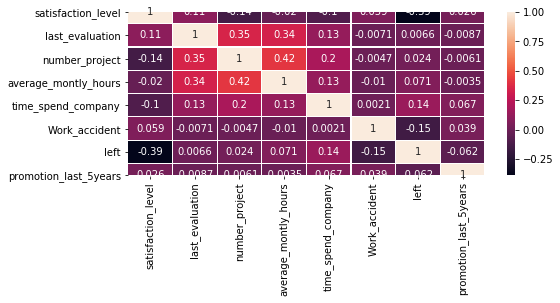

In [8]:
# Построим матрицу корреляций
# Достаточно сильной корреляции нет ни между какими показателями.
# Самая сильная отрицательная связь между left (увольнение) и satisfaction_level
# А также между средним кол-вом часов и кол-вом проектов сотрудника
plt.figure(figsize = (8,3))
sns.heatmap(hr.corr(), annot=True, linewidths=.12)

In [9]:
hr.left.value_counts()
# Уволилось 3571,  работают 11428 человека

0    11428
1     3571
Name: left, dtype: int64

In [101]:
hr.groupby('salary').mean()
# Посмотрим на распределение показателей в зависимости от уровня зарплаты
# Взаимосвязть уровня зп с уровнем текучки и уровнем удовлетворенности очевидна

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [13]:
hr.groupby('department').mean()
# Посмотрим на распределение средних показателей в зависимости от департамента
# наименее довольные сотрудники в hr и accounting, наиболее - в management, с показателем left ситауция диаметрально противоположная

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


Text(0, 0.5, 'Сотрудники')

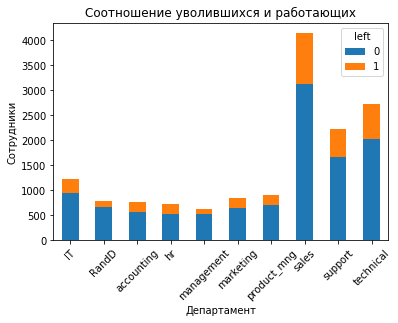

In [15]:
# Посмотрим количество сотрудников по департаментам с учетом увольнений
pd.crosstab(hr.department,hr.left).plot(kind='bar', rot=45, stacked=True)
plt.title('Соотношение уволившихся и работающих',fontsize=12)
plt.xlabel('Департамент',fontsize=10 )
plt.ylabel('Сотрудники', fontsize=10)

In [17]:
# Посмотрим распредление сотрудников, работающих в разных отделах
hr_no_left = hr.loc[hr.left == 0]
hr_no_left.department.value_counts().to_frame()

,department
sales,3126
technical,2023
support,1674
IT,954
product_mng,704
RandD,666
marketing,655
accounting,563
management,539
hr,524


Text(0, 0.5, 'Department')

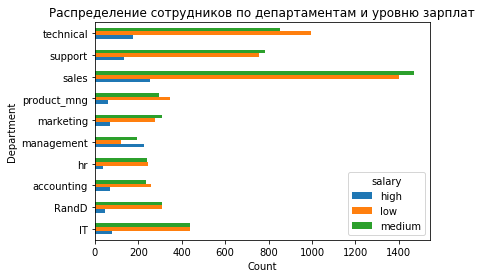

In [104]:
# Посмотрим распредление сотрудников, работающих в разных отделах + категории зарплат на графике
hr_no_left_salary = hr_no_left.groupby(['department','salary'])['left'].count().unstack('salary')
hr_no_left_salary.plot(kind='barh')
plt.title('Распределение сотрудников по департаментам и уровню зарплат',fontsize=12)
plt.xlabel('Count',fontsize=10 )
plt.ylabel('Department', fontsize=10)

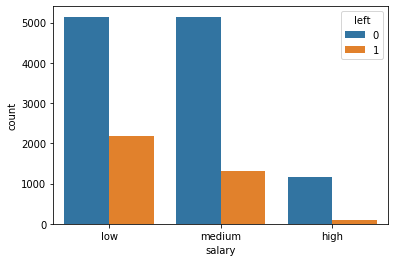

In [39]:
# Посмотрим распределение уровня зарплат и текучки
# Самая большая текучка среди людей с низкой зарплатой

sns.countplot(data = hr, x = 'salary', hue ='left')

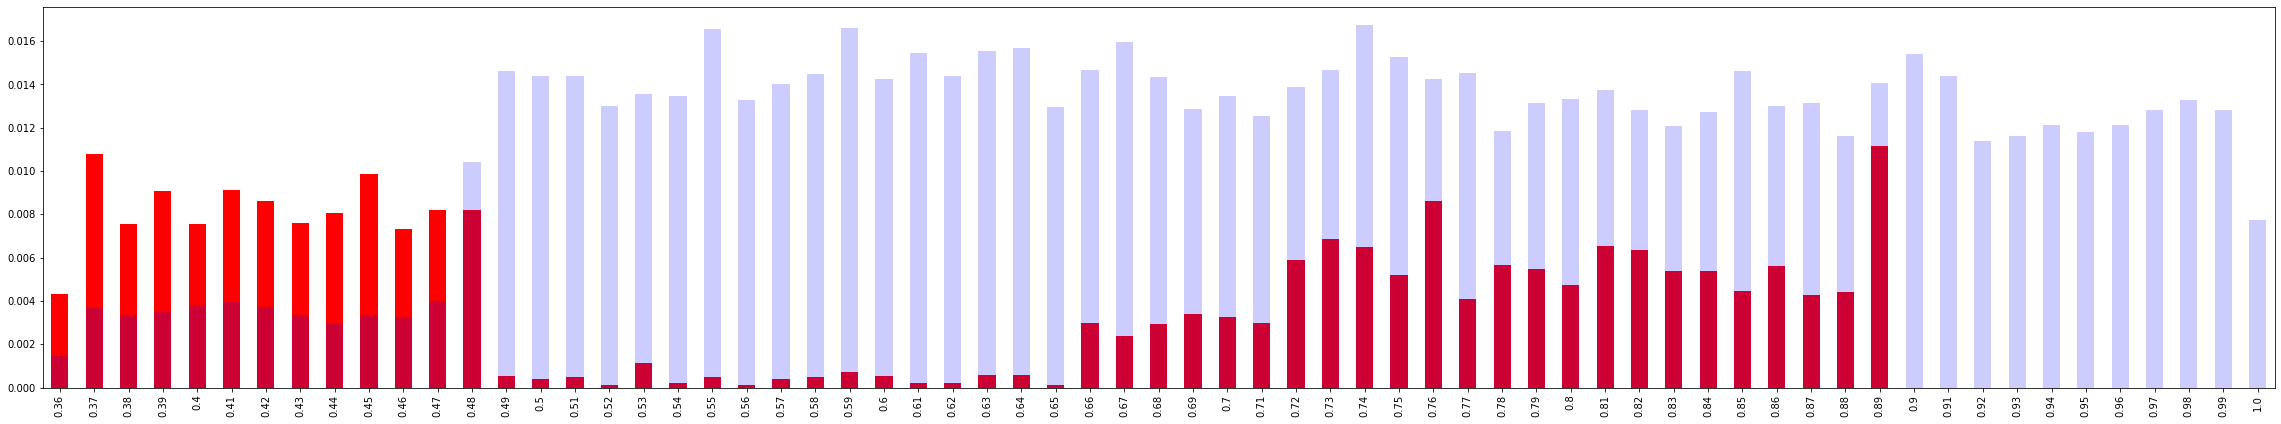

In [40]:
# Посмотрим распределение уволившихся и оставшихся в зависимости от last evaluation
# Судя по всему чаще всего уходят те, у кого оценка до 0,48 и между 0,66 и 0,89
plt.figure(figsize=(40,7))
(hr[hr.left==1].last_evaluation.value_counts().sort_index()/len(hr.left)).plot(kind='bar',color='r')
(hr[hr.left==0].last_evaluation.value_counts().sort_index()/len(hr.left)).plot(kind='bar',color='b',alpha=0.2)

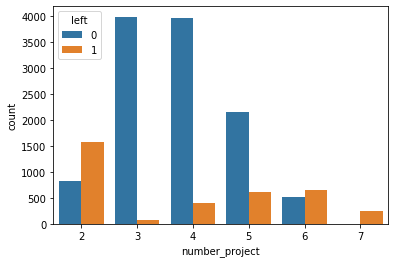

In [105]:
# Посмотрим как кол-во проектов влияет на отток. 
# Судя по всему те, у кого мало проектов или наоборот слишком много - уходят охотнее
sns.countplot(data = hr, x = 'number_project', hue ='left')

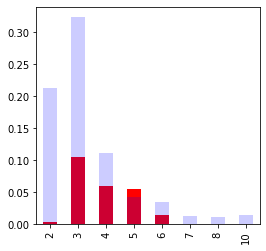

In [42]:
# Посмотрим распределение уволившихся и оставшихся в зависимости от time_spend_company
# Чаще всего уходят те, кто работает около 3х лет
plt.figure(figsize=(4,4))
(hr[hr.left==1].time_spend_company.value_counts().sort_index()/len(hr.left)).plot(kind='bar',color='r')
(hr[hr.left==0].time_spend_company.value_counts().sort_index()/len(hr.left)).plot(kind='bar',color='b',alpha=0.2)

In [19]:
# Посмотрим распредление уволившихся сотрудников по отделам
hr_left = hr.loc[hr.left == 1]
hr_left.department.value_counts().to_frame()

,department
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121
management,91


In [43]:
# Расммотрим более внимательно тех кто уволился, проведем анализ
# Основные группа риска на первый взгляд может быть у людей со следующими атрибутами:  
# 1. Низкий Satisfaction Level 
# 2. Низкий уровень Salary 
# 3. time_spend_company около 3 лет
# 4. слишком мало или слишком много проектов
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [94]:
# Протестируем гипотезу, что есть взаимосвзь текучки и удовлетворенностью работой
# Действительно, взаимосвязь есть
left = hr[hr['left']==1].satisfaction_level
stay = hr[hr['left']==0].satisfaction_level
descriptives, results = rp.ttest(left, stay)
print(descriptives)
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
1  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.448758  
1  0.670790  
2  0.616813  
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...     -0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =     -51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.9895
7                                       Hedge's g =      -0.9894
8                                   Glass's delta =      -

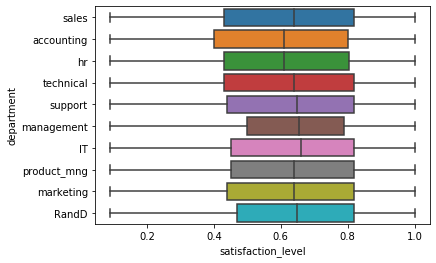

In [23]:
#Посмотрим боксплоты по уровню удовлетворенности по отделам, 
# проверим есть ди значимая разница между уровнем satisfaction level у людей работающих в разных отедлах
sns.boxplot(x='satisfaction_level', y='department', data=hr)

In [75]:
# Возьмем отделы с разным уровнем увольняемости
Slevel_hr = hr[hr.department =='hr']
Slevel_sales = hr[hr.department =='sales']

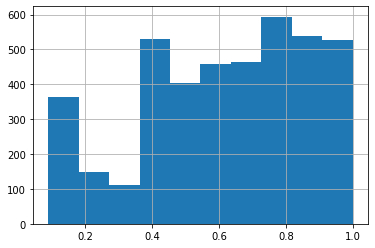

In [77]:
# Распределение у нас не нормальное
Slevel_sales["satisfaction_level"].hist()
Slevel_hr["satisfaction_level"].hist()

In [106]:
# Проверим. Shapiro-Wilk Normality Test
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(Slevel_sales["satisfaction_level"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Вероятно, нормальное')
else:
    print('Вероятно, не нормальное')

stat=0.951, p=0.000
Вероятно, не нормальное


In [107]:
# Посморим, есть ли принципиальная разница в средней удовлетворенности в зависимости от отдела
# Можно утверждать, что есть
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(Slevel_sales["satisfaction_level"], Slevel_hr["satisfaction_level"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('выборочные распределения не отличаются)')
else:
    print('выборочные распределения отличаются')

Statistics=1465976.000, p=0.035
выборочные распределения отличаются


In [53]:
# Далее я хочу воспользоваться методом random forest для оценки важности факторов, влияющих на увольнения

# Переведем текстовые столбцы в числовые. 
departments = pd.get_dummies(hr.department)
departments.rename(columns={0: 'IT', 1: 'RandD', 2: 'accounting', 3: 'hr', 4: 'management', 5: 'marketing', 6: 'product_mng', 7: 'sales', 8: 'support', 9: 'management'}, inplace=True)
hr_new = hr.drop("department", axis=1)
hr_new = hr_new.join(departments)

hr_new.loc[hr_new.salary == 'low', 'salary_low'] = 1
hr_new.loc[hr_new.salary == 'medium', 'salary_medium'] = 1
hr_new.loc[hr_new.salary == 'high', 'salary_high'] = 1
hr_new = hr_new.fillna(0).drop('salary',1)
hr_new.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,salary_low,salary_medium,salary_high
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,0.0,0.0


In [54]:
# Нормализуем значения
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(hr_new)
hr_norm = pd.DataFrame(np_scaled)
headers = list(hr_new.columns.values)
hr_norm.columns = headers
hr_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,salary_low,salary_medium,salary_high
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0


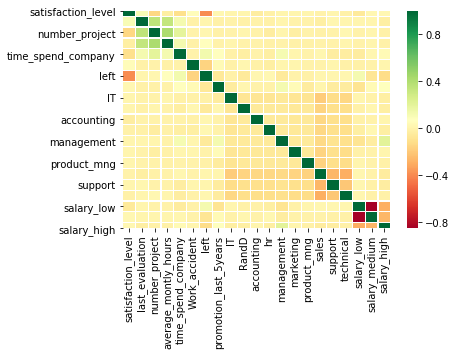

In [72]:
corr = np.round_(hr_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
# Посмтрою еще раз матрицу корреляций

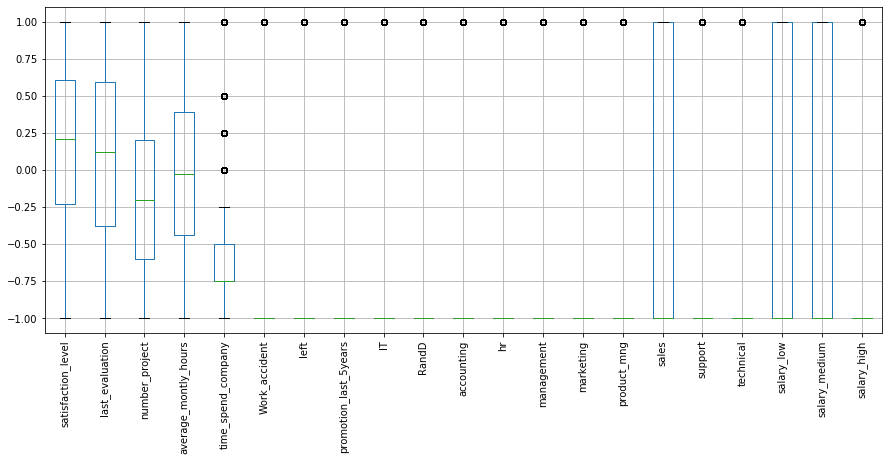

In [56]:
# Проверим выбросы
boxplot = hr_norm.boxplot(figsize=(15,6), rot=90)

In [68]:
model= RandomForestClassifier(n_estimators=100)

feature_var = hr_norm.loc[:,hr_norm.columns != "left"]
pred_var = hr_norm.loc[:,hr_norm.columns=='left']
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)
# Посмотрим, какие показатели выбраны наиболее значимыми

satisfaction_level       0.315792
time_spend_company       0.187031
number_project           0.173868
average_montly_hours     0.159871
last_evaluation          0.117288
Work_accident            0.010204
salary_low               0.006915
salary_high              0.004912
technical                0.003487
salary_medium            0.003235
sales                    0.003182
support                  0.002705
promotion_last_5years    0.001736
management               0.001689
IT                       0.001653
hr                       0.001607
RandD                    0.001475
accounting               0.001427
marketing                0.001016
product_mng              0.000908
dtype: float64


In [ ]:
# В заключение можно сказать, что в группу риска попадают сотрудники с
# низким  satisfaction_level
# time_spend_company 3 года
# number_project 2 или более 4
# average_montly_hours больше среднего
# last_evaluation до 0,48 и между 0,66 и 0,89